In [0]:
!rm dogImages.zip
!rm -rf dogImages
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip -qq dogImages.zip

!rm *.py
!wget https://raw.githubusercontent.com/mrugeles/dog_breeds/master/data_utils.py
!wget https://raw.githubusercontent.com/mrugeles/dog_breeds/master/model_utils.py
!wget https://raw.githubusercontent.com/mrugeles/dog_breeds/master/model_stack.py

!rm *.npz
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz


rm: cannot remove 'dogImages.zip': No such file or directory
--2019-05-09 22:21:50--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.20.17
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.20.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  63.3MB/s    in 16s     

2019-05-09 22:22:06 (68.5 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

rm: cannot remove '*.py': No such file or directory
--2019-05-09 22:22:18--  https://raw.githubusercontent.com/mrugeles/dog_breeds/master/data_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTT

In [0]:
import numpy as np
import data_utils
import model_utils
import time

BATCH_SIZE = 16
TRAIN_PATH = 'dogImages/train'
VALID_PATH = 'dogImages/valid'
TEST_PATH = 'dogImages/test'

VGG_19_WEIGHTS_FILE = 'weights.VGG_19.hdf5'
ResNet_50_WEIGHTS_FILE = 'weights.ResNet_50.hdf5'
Inception_WEIGHTS_FILE = 'weights.Inception.hdf5'
Xception_WEIGHTS_FILE = 'weights.Xception.hdf5'

bottlenecks = ['DogVGG19Data', 'DogResnet50Data', 'DogInceptionV3Data', 'DogXceptionData']


Using TensorFlow backend.


In [0]:
train_files, train_targets, valid_files, valid_targets, test_files, test_targets, dog_names = data_utils.load_datasets(TRAIN_PATH, VALID_PATH, TEST_PATH, True)


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [0]:

from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [0]:
'''

from PIL import ImageFile            
import numpy as np

ImageFile.LOAD_TRUNCATED_IMAGES = True                 
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255
'''

"\n\nfrom PIL import ImageFile            \nimport numpy as np\n\nImageFile.LOAD_TRUNCATED_IMAGES = True                 \ntrain_tensors = paths_to_tensor(train_files).astype('float32')/255\nvalid_tensors = paths_to_tensor(valid_files).astype('float32')/255\ntest_tensors = paths_to_tensor(test_files).astype('float32')/255\n"

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint  

def get_bottleneck_features(bottleneck_file):

  bottleneck_features = np.load(bottleneck_file)
  train = bottleneck_features['train']
  valid = bottleneck_features['valid']
  test = bottleneck_features['test']
  return train, valid, test

def get_model_vgg19(train_features, shape):

  from keras.callbacks import ModelCheckpoint  
  model = Sequential()

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=shape))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

  model.add(Dropout(0.05))
  model.add(GlobalAveragePooling2D(input_shape=train_targets.shape[1:]))
  model.add(Dense(133, activation='softmax'))

  return model

def get_model_resnet50(train_features, shape):
  print(shape)

  from keras.callbacks import ModelCheckpoint  
  model = Sequential()

  model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=shape))
  model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))

  model.add(Dropout(0.05))
  model.add(GlobalAveragePooling2D(input_shape=train_targets.shape[1:]))
  model.add(Dense(133, activation='softmax'))

  return model

def get_model_inceptionV3(train_features, shape):
  print(shape)

  from keras.callbacks import ModelCheckpoint  
  model = Sequential()

  model.add(Conv2D(filters=2048, kernel_size=2, padding='same', activation='relu', input_shape=shape))
  model.add(Conv2D(filters=2048, kernel_size=2, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  
  model.add(Dropout(0.05))
  model.add(GlobalAveragePooling2D(input_shape=train_targets.shape[1:]))
  model.add(Dense(133, activation='softmax'))

  return model


def get_model_Xception(train_features, shape):
  

  from keras.callbacks import ModelCheckpoint  
  model = Sequential()

  model.add(Conv2D(filters=2048, kernel_size=2, padding='same', activation='relu', kernel_initializer='random_uniform', input_shape=shape))
  model.add(Conv2D(filters=2048, kernel_size=2, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  
  model.add(Dropout(0.05))
  model.add(GlobalAveragePooling2D(input_shape=train_targets.shape[1:]))
  model.add(Dense(133, activation='softmax'))

  return model

model_dictionary = {
    'DogVGG19Data': get_model_vgg19,
    'DogResnet50Data':get_model_resnet50,
    'DogInceptionV3Data': get_model_inceptionV3,
    'DogXceptionData': get_model_Xception
}

  
def train_model(model, epochs, train_features, valid_features, train_targets, valid_targets, weights_file):
  model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

  checkpointer = ModelCheckpoint(filepath=weights_file, verbose=0, save_best_only=True)

  history = model.fit(
      train_features, 
      train_targets, 
      validation_data=(valid_features, valid_targets),
      epochs=epochs, 
      batch_size=20, 
      callbacks=[checkpointer], 
      verbose=0)
  return model, history


In [0]:

def build_bottleneck_model(bottleneck, epochs):
  print("Training %s"%(bottleneck))
  bottleneck_file = bottleneck + '.npz'
  weights_file = 'weights.'+bottleneck+'.hdf5'
  train_features, valid_features, test_features = get_bottleneck_features(bottleneck_file)
  #test_tensors.append(test_features)
  input_shape = (train_features.shape[1], train_features.shape[2], train_features.shape[3])
  get_model = model_dictionary[bottleneck]
  model = get_model(train_features, input_shape)  
  model, history = train_model(model, epochs, train_features, valid_features, train_targets, valid_targets, weights_file)  
  return model, history, test_features

def build_bottleneck_n_model(bottleneck, n, epochs):
  bottleneck_file = bottleneck + '.npz'
  weights_file = 'weights.'+bottleneck+'_'+str(n)+'.hdf5'
  train_features, valid_features, test_features = get_bottleneck_features(bottleneck_file)
  #test_tensors.append(test_features)
  input_shape = (train_features.shape[1], train_features.shape[2], train_features.shape[3])
  get_model = model_dictionary[bottleneck]
  model = get_model(train_features, input_shape)  
  model, history = train_model(model, epochs, train_features, valid_features, train_targets, valid_targets, weights_file)  
  return model, history, test_features

Training DogVGG19Data
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


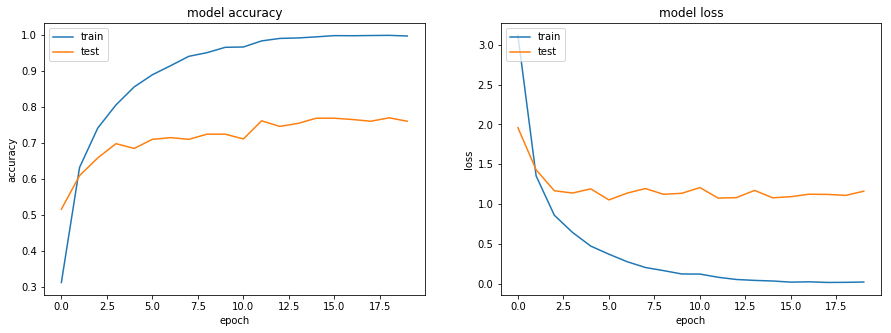

DogVGG19Data accuracy: 73.6842%
Training time: 0.6741% minutes


In [0]:
start_time = time.time()
bottleneck = 'DogVGG19Data'
model, history, test_features = build_bottleneck_model(bottleneck, 20)

model_utils.plot_history(history, 'acc', 'val_acc')
accuracy = model_utils.eval_model(model, 'weights.'+bottleneck+'.hdf5', test_features, test_targets)
  
print('%s accuracy: %.4f%%' % (bottleneck, accuracy))

end_time = time.time() - start_time
print('Training time: %.4f%% minutes' % (end_time / 60))


Training DogResnet50Data
(1, 1, 2048)


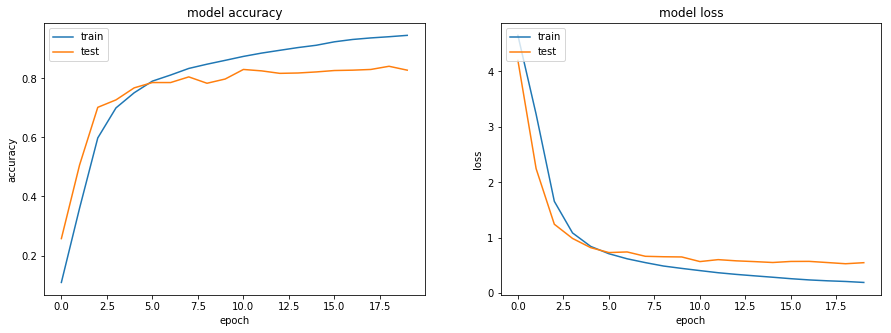

DogResnet50Data accuracy: 83.4928%
Training time: 0.9715% minutes


In [0]:
start_time = time.time()
bottleneck = 'DogResnet50Data'
model, history, test_features = build_bottleneck_model(bottleneck, 20)

model_utils.plot_history(history, 'acc', 'val_acc')
accuracy = model_utils.eval_model(model, 'weights.'+bottleneck+'.hdf5', test_features, test_targets)
  
print('%s accuracy: %.4f%%' % (bottleneck, accuracy))

end_time = time.time() - start_time
print('Training time: %.4f%% minutes' % (end_time / 60))


Training DogInceptionV3Data
(5, 5, 2048)


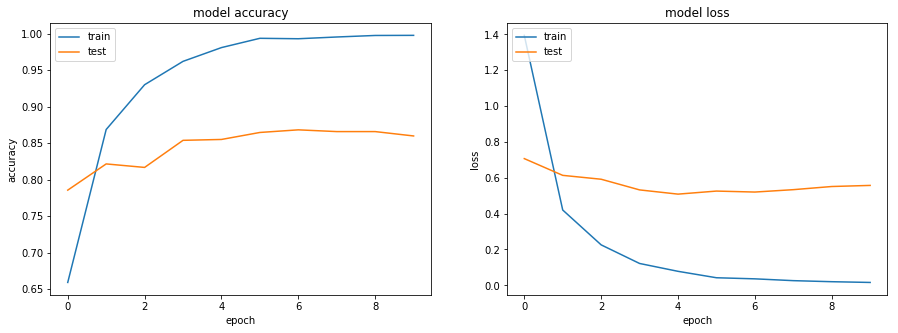

DogInceptionV3Data accuracy: 83.0144%
Training time: 3.1227% minutes


In [0]:
start_time = time.time()
bottleneck = 'DogInceptionV3Data'
model, history, test_features = build_bottleneck_model(bottleneck, 10)

model_utils.plot_history(history, 'acc', 'val_acc')
accuracy = model_utils.eval_model(model, 'weights.'+bottleneck+'.hdf5', test_features, test_targets)
  
print('%s accuracy: %.4f%%' % (bottleneck, accuracy))

end_time = time.time() - start_time
print('Training time: %.4f%% minutes' % (end_time / 60))

DogInceptionV3Data accuracy: 81.9378%

DogInceptionV3Data accuracy: 82.7751%


Training DogXceptionData


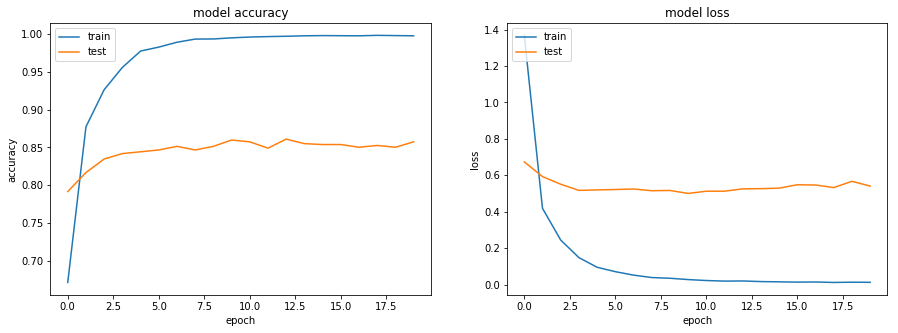

DogXceptionData accuracy: 85.6459%
Training time: 8.7808% minutes


In [0]:

start_time = time.time()
bottleneck = 'DogXceptionData'
model, history, test_features = build_bottleneck_model(bottleneck, 20)

model_utils.plot_history(history, 'acc', 'val_acc')
accuracy = model_utils.eval_model(model, 'weights.'+bottleneck+'.hdf5', test_features, test_targets)
  
print('%s accuracy: %.4f%%' % (bottleneck, accuracy))

end_time = time.time() - start_time
print('Training time: %.4f%% minutes' % (end_time / 60))

## Build several models

In [0]:
bottleneck = 'DogXceptionData'

for i in range(6):
  n = i + 1
  model, history, test_features = build_bottleneck_n_model(bottleneck, n ,20)
  accuracy = model_utils.eval_model(model, 'weights.'+bottleneck+'_'+str(n)+'.hdf5', test_features, test_targets)
  print('Sub model %s %d accuracy: %.4f%%' % (bottleneck, n, accuracy))

Sub model DogXceptionData 1 accuracy: 84.5694%
Sub model DogXceptionData 2 accuracy: 84.0909%
Sub model DogXceptionData 3 accuracy: 85.2871%
Sub model DogXceptionData 4 accuracy: 86.0048%
Sub model DogXceptionData 5 accuracy: 86.0048%
Sub model DogXceptionData 6 accuracy: 85.2871%


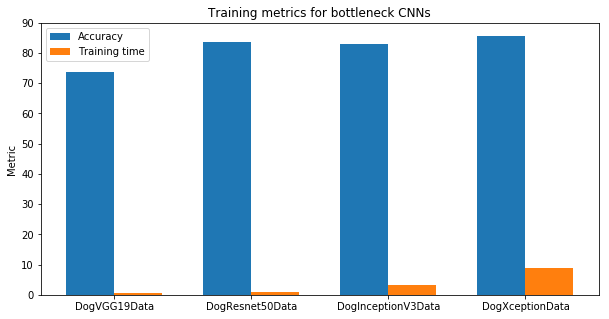

In [4]:
import matplotlib.pyplot as plt
import numpy as np

N = 4
accuracy = (73.68, 83.49, 83.01, 85.64)
training_time = (0.67, 0.97, 3.12, 8.78)

ind = np.arange(N) 
width = 0.35       

plt.subplots(1, 1, figsize=(10, 5))
  
plt.bar(ind, accuracy, width, label='Accuracy')
plt.bar(ind + width, training_time, width, label='Training time')

plt.ylabel('Metric')
plt.title('Training metrics for bottleneck CNNs')

plt.xticks(ind + width / 2, ('DogVGG19Data', 'DogResnet50Data', 'DogInceptionV3Data', 'DogXceptionData'))
plt.legend(loc='best')
plt.show()

In [10]:
import pandas as pd

data = {
    'Model': ['DogXceptionData Training 1', 'DogXceptionData Training 2', 'DogXceptionData Training 3', 'DogXceptionData Training 4', 'DogXceptionData Training 5', 'DogXceptionData Training 6'],
    'Accuracy': [84.5694, 84.0909, 85.2871, 86.0048, 86.0048, 85.2871]
}

bottleneck_accuracy = pd.DataFrame.from_dict(data)

display(bottleneck_accuracy)

display(bottleneck_accuracy.describe())

,Model,Accuracy
0,DogXceptionData Training 1,84.5694
1,DogXceptionData Training 2,84.0909
2,DogXceptionData Training 3,85.2871
3,DogXceptionData Training 4,86.0048
4,DogXceptionData Training 5,86.0048
5,DogXceptionData Training 6,85.2871


,Accuracy
count,6.000000
mean,85.207350
std,0.766553
min,84.090900
25%,84.748825
50%,85.287100
75%,85.825375
max,86.004800
